In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder



In [2]:
df=pd.read_csv("bodyPerformance.csv")
display(df)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:

def description (data: pd.DataFrame):
    print(f"Shape: \n{data.shape}\n")
    print(f"Dimension: \n{data.ndim}\n")
    print(f"Data types: \n{data.dtypes}\n")
    print(f"Data information: \n{data.info()}\n")
    print(f"Data description: \n{data.describe()}\n")
    print(f"Total de valores nulos: \n{data.isnull().sum()}\n")
    print(f"Total de valores duplicados: \n{data.duplicated().sum()}\n")

description(df)

Shape: 
(13393, 12)

Dimension: 
2

Data types: 
age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic               

In [4]:
#Eliminar valor duplicado:

#Creo una variable que me indique si hay valores duplicados:
duplicados = df.duplicated()
#Muestro los valores duplicados:
fila_duplicada = df[duplicados]
print("Fila duplicada:")
print(fila_duplicada)
#Elimino los valores duplicados:
df.drop_duplicates(inplace=True)
#Verifico que se hayan eliminado los valores duplicados:
print(f"Total de valores duplicados: \n{df.duplicated().sum()}\n")

Fila duplicada:


        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0      F      157.0       49.1        30.7       70.0      86.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
12473       27.7                     19.7            51.0          167.0     A  
Total de valores duplicados: 
0



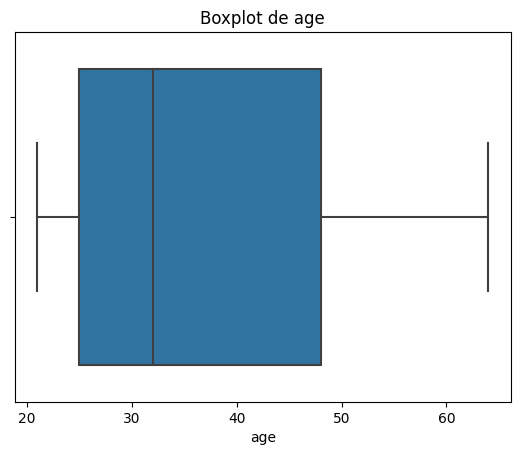

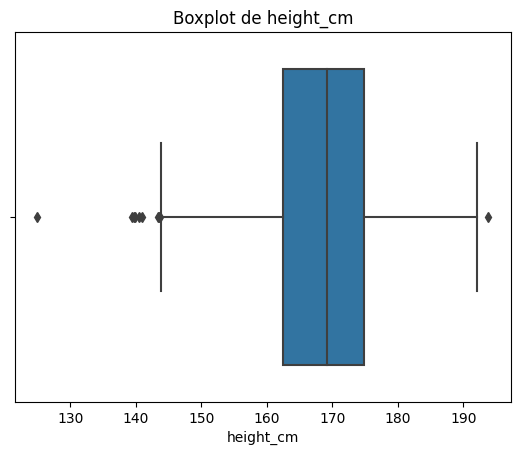

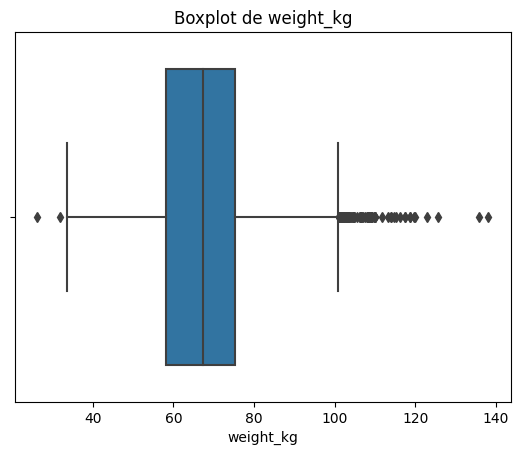

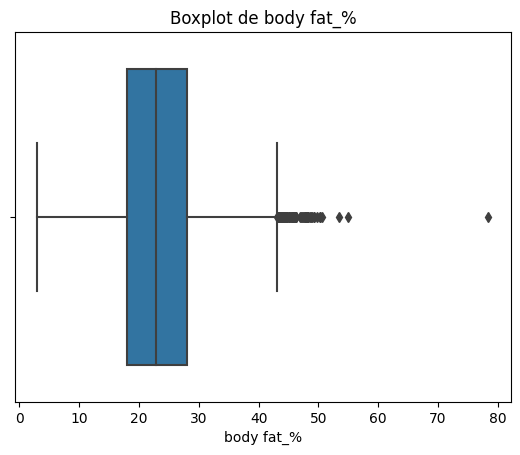

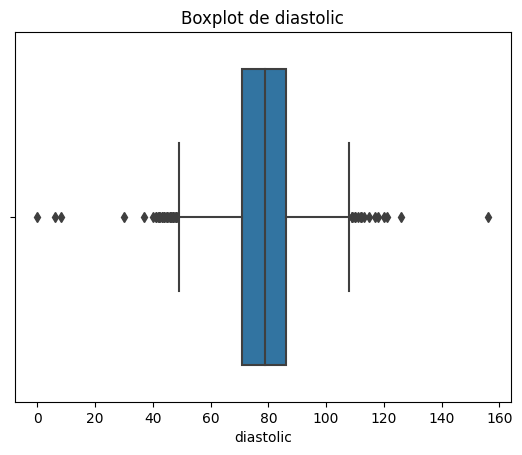

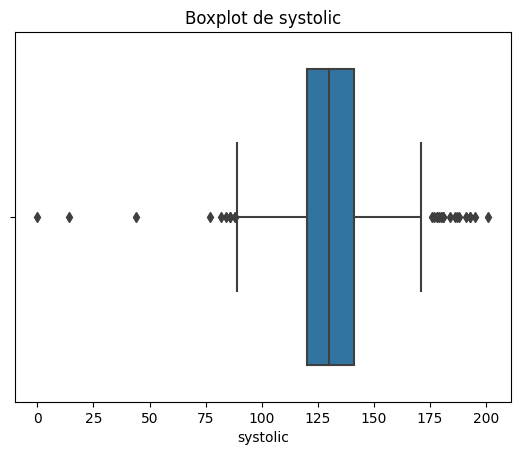

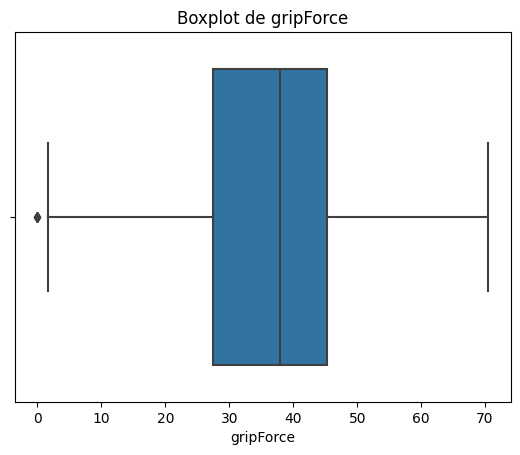

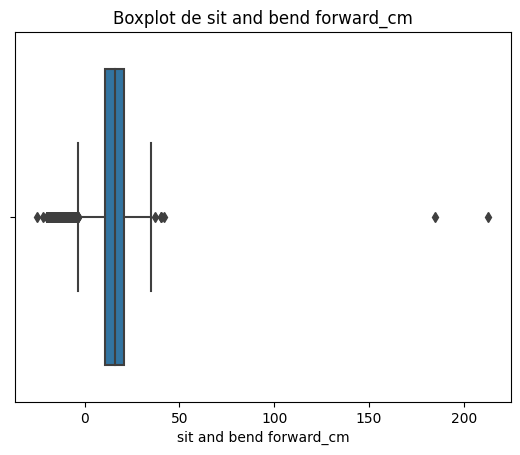

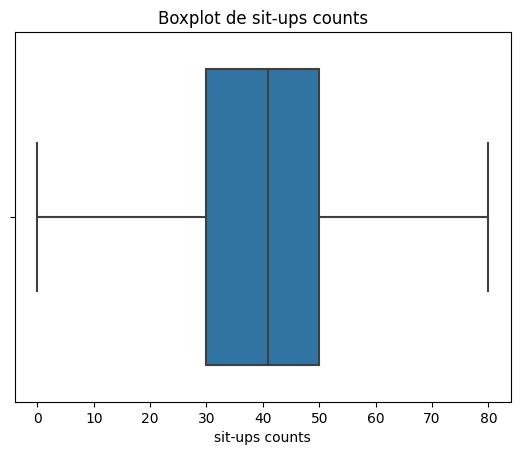

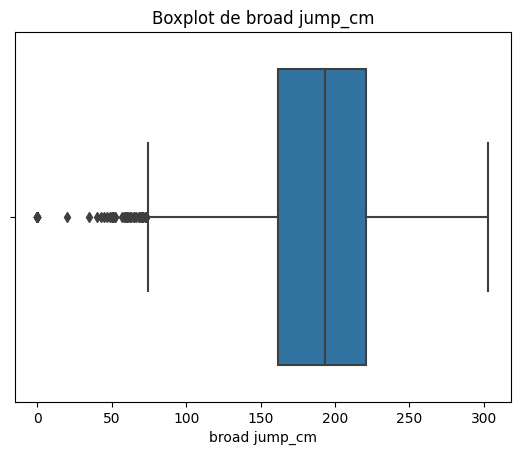

Registros con outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
58     42.0      M      174.1     103.10    30.50000       78.0     123.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
136    61.0      F      153.2      62.20    37.00000       71.0     111.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [5]:
# Identificación de outliers:

numericas = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for column in numericas:
    sns.boxplot(x=df[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

In [6]:
# Eliminar las filas que contienen outliers
df = df[~outliers]

# Mostrar el DataFrame limpio
print("DataFrame sin outliers:")
print(df)

DataFrame sin outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [7]:
# Conversión cm a m.
#Conversion y renombrado de la altura (height_cm):
df["alto_m"] = df["height_cm"]/100
#Conversion y renombrado de columna Sentarse e inclinarse hacia adelante (sit and bend forward_cm):
df["sentarse_inclinarse_m"] = df["sit and bend forward_cm"]/100
#Conversion y renombrado de columna salto en largo (broad jump_cm):
#f["salto_largo_m_"] = df["broad jump_cm"]/100

#Eliminar columnas en cm.
df.drop(["height_cm","sit and bend forward_cm","broad jump_cm"], axis=1, inplace=True)

# Calcula el IMC:
df['IMC'] = df['weight_kg'] / (df['alto_m'] ** 2)

#Renombrar las columnas:
df.rename(columns={"age": "edad", "gender": "genero", "weight_kg": "peso_kg","body fat_%": "grasa_corporal_%","diastolic": "diastolica","systolic": "sistolica","gripForce": "fuerza_agarre", "sit-ups counts": "cant_abdominales","class": "clase"}, inplace=True)

df.head()

,edad,genero,peso_kg,grasa_corporal_%,diastolica,sistolica,fuerza_agarre,cant_abdominales,clase,alto_m,sentarse_inclinarse_m,IMC
0,27.0,M,75.24,21.3,80.0,130.0,54.9,60.0,C,1.723,0.184,25.344179
1,25.0,M,55.80,15.7,77.0,126.0,36.4,53.0,A,1.650,0.163,20.495868
2,31.0,M,78.00,20.1,92.0,152.0,44.8,49.0,C,1.796,0.120,24.181428
3,32.0,M,71.10,18.4,76.0,147.0,41.4,53.0,B,1.745,0.152,23.349562
4,28.0,M,67.70,17.1,70.0,127.0,43.5,45.0,B,1.738,0.271,22.412439


In [8]:
#Binarizado de la columna genero: Utilizamos get_dummies para crear una columna por cada valor de la columna genero. 
#(La columna genero se elimina y se crea genero_M donde M:1 / F:0)

df = pd.get_dummies(df, columns=['genero'], drop_first=True)
# renombramos la columna genero_M a genero:
df.rename(columns={"genero_M":'genero'},inplace=True)
conteo_genero = df['genero'].value_counts()

# Mostrar los conteos de las columnas genero y clase:
print('Cantidad de 0 y 1 en la columna género:')
print(conteo_genero)

Cantidad de 0 y 1 en la columna género:
1    8002
0    4723
Name: genero, dtype: int64


In [9]:
# Verifico nulos en 'genero' y 'clase' en df
print('Nulos en genero en df:', df['genero'].isnull().sum())
print('Nulos en clase en df:', df['clase'].isnull().sum())

Nulos en genero en df: 0
Nulos en clase en df: 0


In [10]:
# Asignamos valores numéricos a las clases: Usamos la función labelEncoder para mapear los valores categóricos de "clase" a valores numericos.

# Mapeo de valores de la columna clase:
# A:0,
# B:1,
# C:2,
# D:3

encode =LabelEncoder()
df["clase_encode"] = encode.fit_transform(df["clase"])
# Eliminamos la columna clase:
df.drop(["clase"], axis=1, inplace=True)
# renombramos la columna clase_encode a clase:
df.rename(columns={"clase_encode":'clase'},inplace=True)
conteo_clase = df['clase'].value_counts()
print('Cantidad de 0,1,2,3 en la columna clase:')
print(conteo_clase)

Cantidad de 0,1,2,3 en la columna clase:
2    3324
0    3320
1    3315
3    2766
Name: clase, dtype: int64


In [11]:
target = 'clase'

 Division del df en un df para entrenamiento y prueba
 

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=99,
                                stratify=df[target])
print(train.shape, test.shape)

(11452, 12) (1273, 12)


PyCaret’s Classification Module

Documentacion aqui: https://pycaret.gitbook.io/docs/get-started/installation LEEME

In [13]:
#Variacion de instalacion para instalar mas paquetes, --user por problemas con permisos en la pc. En kraggle, hay otras versiones. Esta me funciono a mi.
#La primera instalacion puede demorar varios minutos y hasta requerir que reinicie el sistema. Paciencia.
%pip install pycaret[full] --user 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from pycaret.classification import *

In [15]:
exp_clf = setup(train, target = 'clase',session_id=1)

,Description,Value
0,Session id,1
1,Target,clase
2,Target type,Multiclass
3,Original data shape,"(11452, 12)"
4,Transformed data shape,"(11452, 12)"
5,Transformed train set shape,"(8016, 12)"
6,Transformed test set shape,"(3436, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [16]:
best = compare_models()

In [17]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Analizamos el rendimiento del modelo.

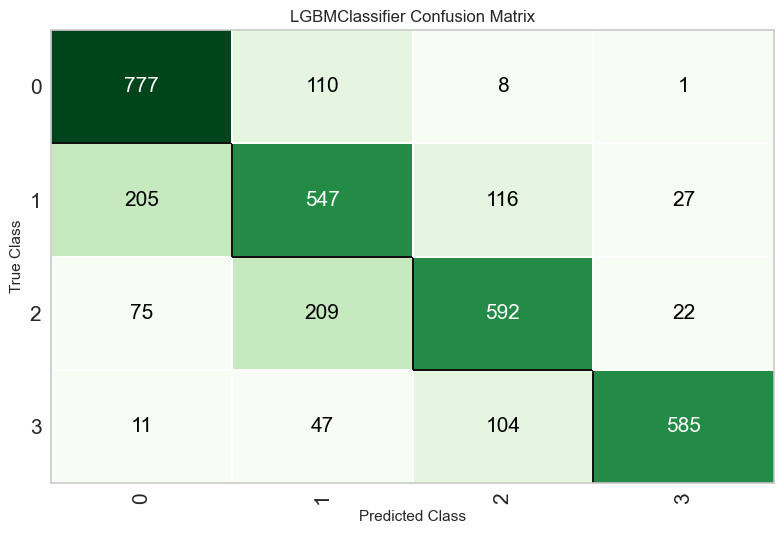

In [18]:
#Matriz de confucion.
plot_model(best, plot="confusion_matrix")

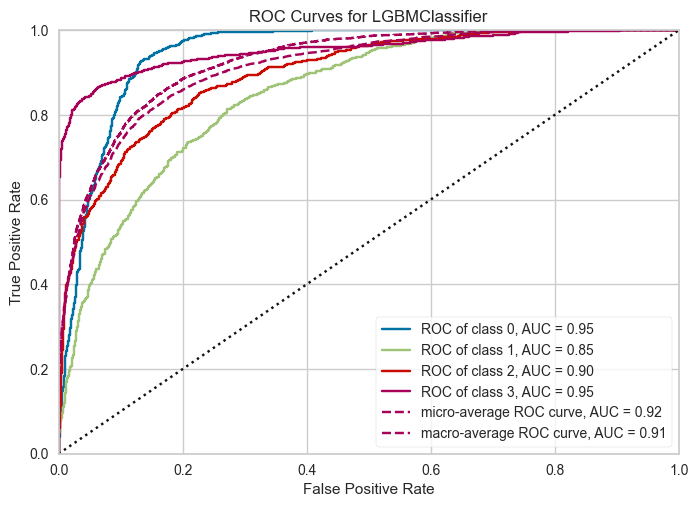

In [19]:
#Area bajo la curva
plot_model(best, plot = 'auc')


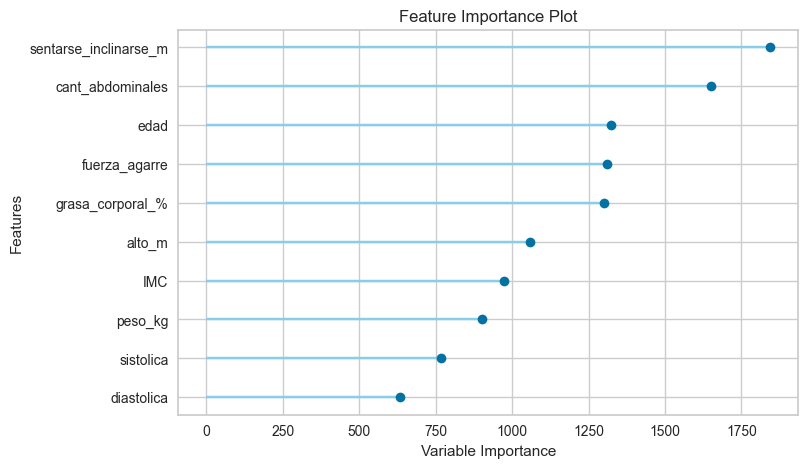

In [20]:
#Importancia de funciones
plot_model(best, plot = 'feature')

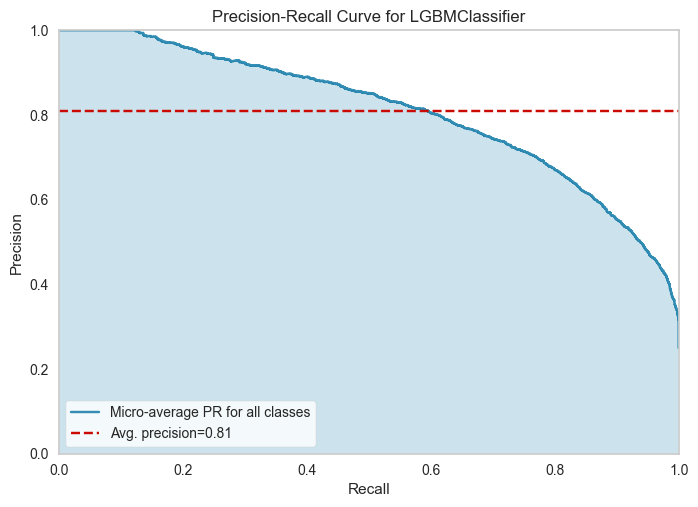

In [21]:
#Curva de recuperacion precisiva
plot_model(best, plot=("pr"))

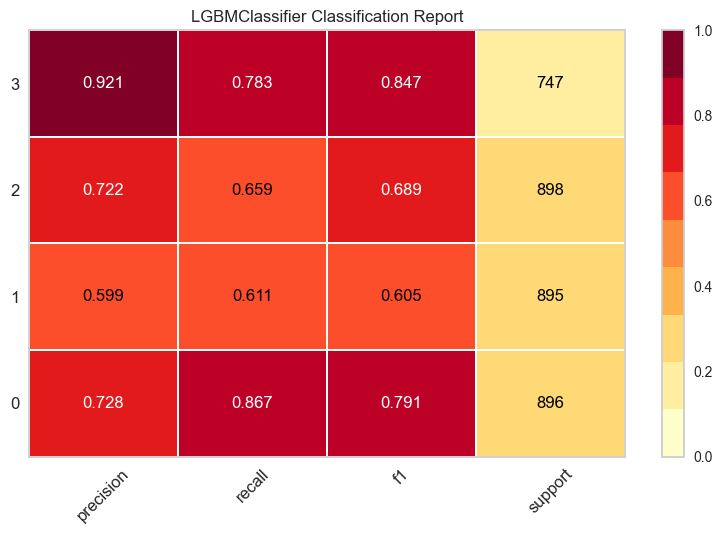

In [22]:
#Informe de clasificacion
plot_model(best, plot=("class_report"))

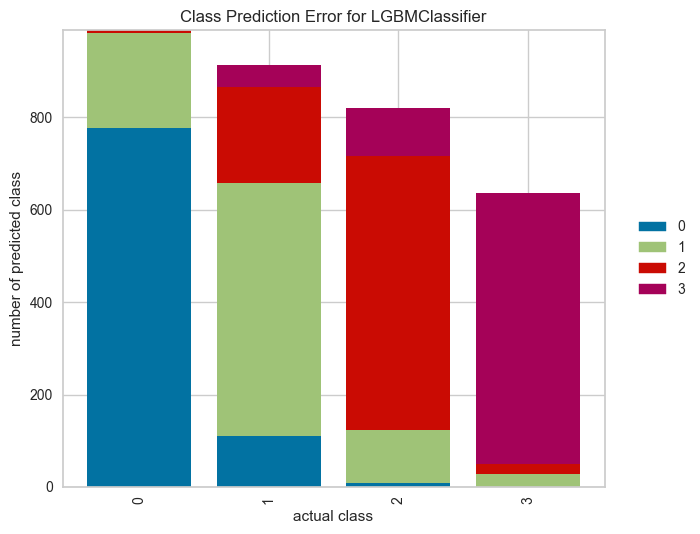

In [23]:
#Error de prediccion de clase
plot_model(best, plot=("error"))

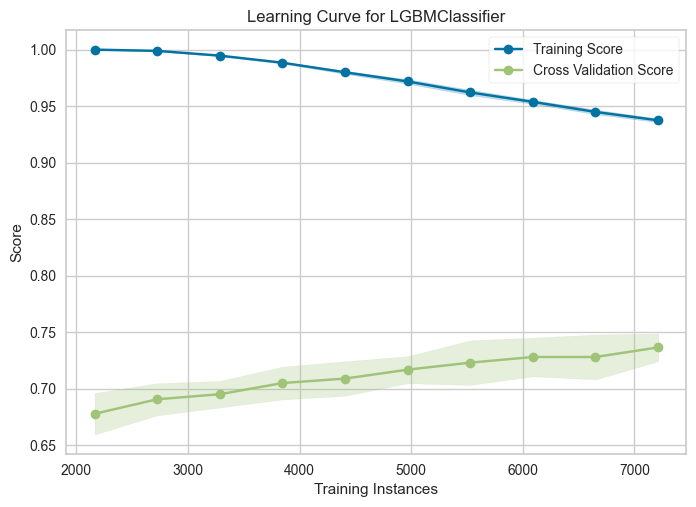

In [24]:
#Curva de aprendizaje
plot_model(best, plot=("learning"))

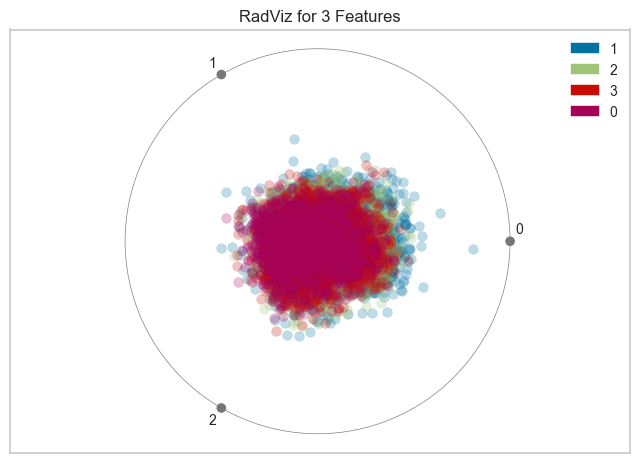

In [25]:
#Aprendzaje de Dimenisones
plot_model(best, plot=("dimension"))

In [26]:
#Hiperparametros del modelo
plot_model(best, plot=("parameter"))


,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


Predicciones

In [27]:
predictions = predict_model(best, data=df)
predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8536,0.9649,0.8536,0.8582,0.8536,0.8042,0.8057


,edad,peso_kg,grasa_corporal_%,diastolica,sistolica,fuerza_agarre,cant_abdominales,alto_m,sentarse_inclinarse_m,IMC,genero,clase,prediction_label,prediction_score
0,27.0,75.239998,21.299999,80.0,130.0,54.900002,60.0,1.723,0.184,25.344179,1,2,0,0.6917
1,25.0,55.799999,15.700000,77.0,126.0,36.400002,53.0,1.650,0.163,20.495869,1,0,0,0.5497
2,31.0,78.000000,20.100000,92.0,152.0,44.799999,49.0,1.796,0.120,24.181427,1,2,2,0.5080
3,32.0,71.099998,18.400000,76.0,147.0,41.400002,53.0,1.745,0.152,23.349562,1,1,1,0.5400
4,28.0,67.699997,17.100000,70.0,127.0,43.500000,45.0,1.738,0.271,22.412439,1,1,1,0.6182
5,36.0,55.400002,22.000000,64.0,119.0,23.799999,27.0,1.654,0.210,20.250641,0,1,1,0.6712
6,42.0,63.700001,32.200001,72.0,135.0,22.700001,18.0,1.645,0.008,23.540064,0,3,3,0.9999
7,33.0,77.199997,36.900002,84.0,137.0,45.900002,42.0,1.749,0.123,25.236998,1,1,1,0.7465
8,54.0,67.500000,27.600000,85.0,165.0,40.400002,34.0,1.668,0.186,24.261168,1,2,2,0.3916
9,28.0,84.599998,14.400000,81.0,156.0,57.900002,55.0,1.850,0.121,24.718773,1,1,1,0.8924


Guardar el modelo

In [ ]:
save_model(best, 'model_lgtm_bodyPerformance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'peso_kg',
                                              'grasa_corporal_%', 'diastolica',
                                              'sistolica', 'fuerza_agarre',
                                              'cant_abdominales', 'alto_m',
                                              'sentarse_inclinarse_m', 'IMC',
                                              'genero'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 

In [ ]:
# Para volver a cargar el modelo en un entorno
#loaded_model = load_model('my_best_pipeline')
#print(loaded_model)